Comparación entre RK4 y Euler:

Fórmula para Euler:

$$ y_{n+1} = y_n + \Delta t \times f(t_n, y_n) $$

Fórmula para Runge-Kutta de orden 4:

$$ y_{n+1} = y_n + \frac{\Delta t}{6}\left( k_1 + 2k_2 + 2k_3 +k_4\right)$$
donde:

$$ k1 = f(t_n, y_n) $$
$$ k2 = f(t_n+0.5\Delta t, y_n+0.5\Delta t k_1) $$
$$ k3 = f(t_n+0.5\Delta t, y_n+0.5\Delta t k_2) $$
$$ k4 = f(t_n+\Delta t, y_n+\Delta t k_3) $$

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

def f(t, y): return y

def rk4(t0, y0, dt, f):
    k1 = f(t0, y0)
    k2 = f(t0 + dt/2.0, y0 + dt * k1 / 2.0)
    k3 = f(t0 + dt/2.0, y0 + dt * k2 / 2.0)
    k4 = f(t0 + dt, y0 + dt * k3)
    y = y0 + (dt/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    return y

def euler(t0, y0, dt, f):
    f0 = f(t0, y0)
    y = y0 + dt*f0
    return y

## Comparacion entre ambos métodos numéricos

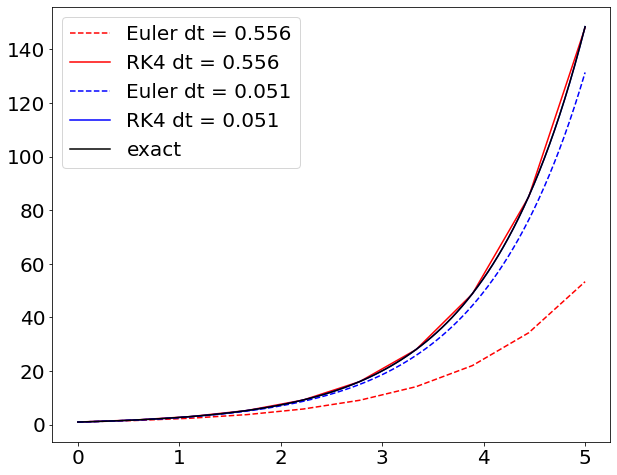

In [3]:
def exact_sol(t): return np.exp(t)

tmax = 5
plt.figure(figsize=(10, 8))
for n, c in zip([10,100], ['red', 'blue']):
    ys_rk4 = [1]
    ys_euler = [1]
    ts = np.linspace(0,tmax,n)
    dt = ts[1]-ts[0]
    for i in range(n-1):
        u_rk4 = rk4(ts[i], ys_rk4[i], dt, f)
        u_euler = euler(ts[i], ys_euler[i], dt, f)
        ys_rk4.append(u_rk4)
        ys_euler.append(u_euler)
    plt.plot(ts, ys_euler, '--', color = c, label = 'Euler dt = {}'.format(round(dt,3)))
    plt.plot(ts, ys_rk4, color=c, label = 'RK4 dt = {}'.format(round(dt, 3)))
plot_text_size = 20
plt.plot(ts, exact_sol(ts), '-k', label = 'exact')
plt.xticks(fontsize=plot_text_size)
plt.yticks(fontsize=plot_text_size)
plt.legend(fontsize = plot_text_size)
plt.show()

## Cálculo del error numérico acumulado

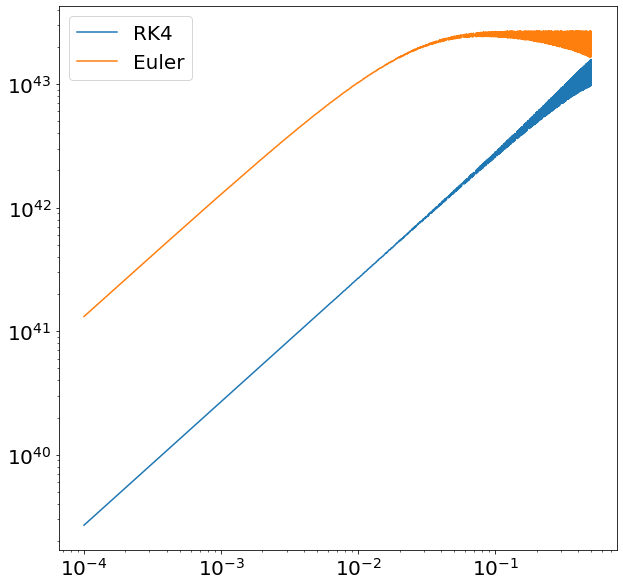

In [4]:
tmax = 100
dt_arr = np.arange(0.0001, 0.5, 0.0001)
error_rk4 = []
error_euler = []
for dt in dt_arr:
    ys_rk4 = [1]
    ys_euler = [1]
    ts = np.arange(0,tmax,dt)
    for i in range(len(ts)):
        u_rk4 = rk4(ts[i], ys_rk4[i], dt, f)
        u_euler = euler(ts[i], ys_euler[i], dt, f)
        ys_rk4.append(u_rk4)
        ys_euler.append(u_euler)
    ys_exact = exact_sol(ts)
    error_rk4.append(np.abs(ys_rk4[-1]-ys_exact[-1]))
    error_euler.append(np.abs(ys_euler[-1]-ys_exact[-1]))

plt.figure(figsize=(10, 10))    
plot_text_size = 20
plt.plot(dt_arr, error_rk4, label = 'RK4')
plt.plot(dt_arr, error_euler, label = 'Euler')
plt.xticks(fontsize=plot_text_size)
plt.yticks(fontsize=plot_text_size)
plt.legend(fontsize = plot_text_size)
plt.yscale('log')
plt.xscale('log')
plt.show()